<a href="https://colab.research.google.com/github/rzunick/MNA-Vision-Computacional-Equipo-18/blob/main/9_4_Segmentaci%C3%B3n_Otsu_Equipo18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión Computacional para Imágenes y Video**
Tecnológico de Monterrey

Dr. Gilberto Ochoa Ruiz

##**Semana 9: Segmentación Otsu**


##**Equipo 18**
**Integrantes del equipo:** 
* Ronald David Zuniga - A01686240
* David Valles Canedo - A01191310
* Héctor Raúl Vázquez - A00565542
* Andrea Vázquez Tadeo - A01730613
* Miguel Angel Villanueva - A01793890

# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [8]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np
import cv2 

In [2]:
#Código para importar carpeta de imágenes en Git-Hub
!git clone https://github.com/rzunick/MNA-Vision-Computacional-Equipo-18.git

# Modificar las rutas locales incluyendo: /content/MNA-Vision-Computacional-Equipo-18/

Cloning into 'MNA-Vision-Computacional-Equipo-18'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 296 (delta 58), reused 37 (delta 37), pack-reused 224
Receiving objects: 100% (296/296), 121.30 MiB | 11.02 MiB/s, done.
Resolving deltas: 100% (103/103), done.


## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

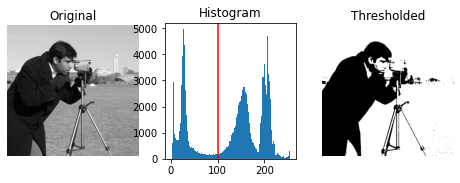

In [3]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




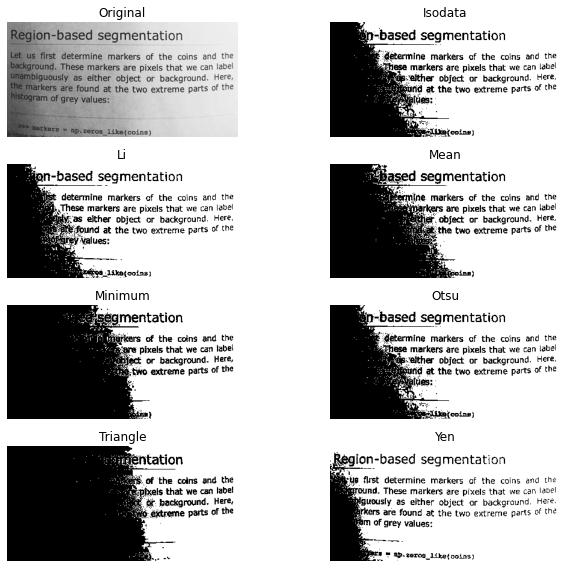

In [4]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [5]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

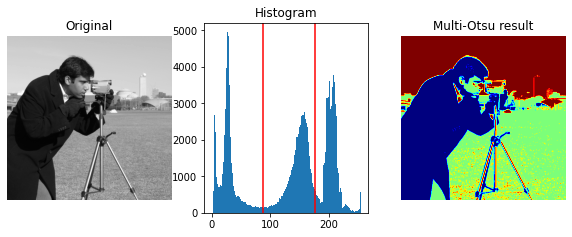

In [6]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# **Ejercicios**

### Importar Imágenes

In [17]:
# Importar rutas de imágenes para ejercicio
path1 = "/content/MNA-Vision-Computacional-Equipo-18/data/saturn.jpg"
path2 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu4.jpg"
path3 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu1.jpg"
path4 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu2.jpg"
path5 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu3.jpg"

# Cargar imágenes 
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)
img4 = cv2.imread(path4)
img5 = cv2.imread(path5)

# Cargar imágenes en escala de grises
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2GRAY)

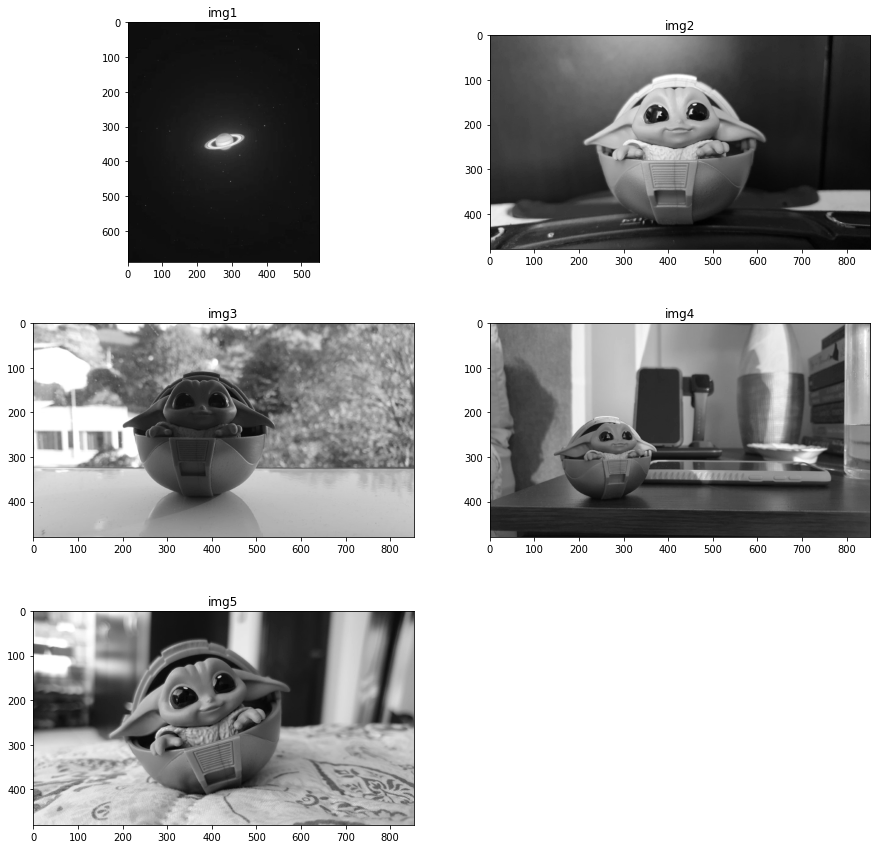

In [18]:
# Mostrar imágenes importadas
images = [img1, img2, img3, img4, img5]
plt.figure(figsize=(15, 15))

for i, img in enumerate(images):
    plt.subplot(3, 2, i+1)
    plt.imshow(img, cmap="gray")
    plt.title("img{}".format(i+1))

## Ejercicio 1 - Pruebas con backround sólido

Se utilizan Imágenes 1 y 2.

### Simple Thresholding

### Multi Thresholding

## Ejercicio 2 - Pruebas con background complejo

Se utilizan Imágenes 3, 4, y 5.

### Simple Thresholding

### Multi Thresholding 

## Ejercicio 3 - Pruebas con ventanas de diferentes tamaños

### Multi Window Thresholding

## Conclusiones